In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.utils import class_weight
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier 
from imblearn.over_sampling import SMOTE

# Prepare Data

In [2]:
df = pd.read_csv("/kaggle/input/adni1-final/Gene_Data_Adni_1.csv")

In [3]:
df = pd.read_csv("/kaggle/input/adni1-final/Gene_Data_Adni_1.csv").drop(["Unnamed: 0","Unnamed: 0.1","Unnamed: 0.2","Unnamed: 0.3","ID"], axis=1)

In [4]:
df['label'].replace('  ', np.nan, inplace=True)
df= df.dropna(subset=['label'])

# Encode categorical data 

In [5]:
#CN 1, AD 0, MCI 2
#M 1, F 0
label_encoder = LabelEncoder()
df["label"]= label_encoder.fit_transform(df["label"])
df["gender"]= label_encoder.fit_transform(df["gender"])

In [6]:
features = df.drop('label',axis=1)
label= df.label

In [7]:
x_train,x_test,y_train,y_test = train_test_split(features,label,test_size=0.2,stratify=label,random_state = 42)

# SMOTE 

In [8]:
print("Before OverSampling, count of label 'AD':{}".format(sum(y_train == 0)))
print("Before OverSampling, count of label 'CN':{}".format(sum(y_train == 1)))
print("Before OverSampling, count of label 'MCI':{}".format(sum(y_train == 2)))

Before OverSampling, count of label 'AD':187
Before OverSampling, count of label 'CN':315
Before OverSampling, count of label 'MCI':153


In [9]:
sm = SMOTE(random_state = 42)
x_train, y_train = sm.fit_resample(x_train, y_train)

In [10]:
print("After OverSampling, count of label 'AD':{}".format(sum(y_train == 0)))
print("After OverSampling, count of label 'CN':{}".format(sum(y_train == 1)))
print("After OverSampling, count of label 'MCI':{}".format(sum(y_train == 2)))

After OverSampling, count of label 'AD':315
After OverSampling, count of label 'CN':315
After OverSampling, count of label 'MCI':315


# Random Forest 

In [19]:
RF = RandomForestClassifier(n_estimators = 300, criterion = "gini", max_depth = 20, max_features = "auto", min_samples_split = 3, min_samples_leaf = 2, random_state = 42)

In [20]:
RF.fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=20, max_features='auto', min_samples_leaf=2,
                       min_samples_split=3, n_estimators=300, random_state=42)

In [21]:
RF_predict = RF.predict(x_test)

# XGBoost 

In [22]:
xb = xgb.XGBClassifier(min_child_weight = 3, gamma= 0, max_depth = 5, subsample = 1, random_state=42)

In [23]:
xb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [24]:
xb_predict = xb.predict(x_test)

# SVM Poly

In [25]:
svm_classfier = SVC(kernel = "poly",probability= True,random_state = 42)

In [26]:
svm_classfier.fit(x_train, y_train)

SVC(kernel='poly', probability=True, random_state=42)

In [27]:
svm_predict = svm_classfier.predict(x_test)

# compare predictions 

In [28]:
print(np.array(y_test))
print("SVM POLY PREDICT:", svm_predict)
print("accruracy score is : " , accuracy_score(np.array(y_test), svm_predict)) 


print("RF PREDICT:", RF_predict)
print("accruracy score is : " , accuracy_score(np.array(y_test), RF_predict)) 


print("XGB PREDICT:", xb_predict)
print("accruracy score is : " , accuracy_score(np.array(y_test), xb_predict)) 


[1 2 0 2 1 1 2 0 2 1 2 0 1 0 1 2 2 1 1 1 1 2 0 0 1 2 0 1 2 1 0 1 1 1 0 1 2
 0 0 2 0 2 0 0 2 1 1 0 1 0 0 1 1 2 0 1 0 1 1 1 1 0 0 0 2 0 2 2 1 1 1 1 0 2
 1 0 2 1 1 2 1 0 1 1 2 0 1 1 2 1 2 2 0 1 1 0 1 0 1 2 0 1 1 1 1 2 1 1 0 1 1
 1 1 0 1 2 0 2 2 0 2 1 1 0 1 1 2 1 1 0 1 0 0 2 2 0 0 1 0 1 1 1 1 1 1 2 1 2
 1 1 0 1 1 1 0 2 0 1 0 1 1 0 2 1]
SVM POLY PREDICT: [0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 2 0 2 0 2 2 0 2 2 2 0 2 0 0 0 0 2 0 0 0
 0 0 0 2 2 0 0 2 0 2 2 0 0 2 2 0 0 0 0 2 2 0 2 2 0 2 2 0 0 2 2 2 0 0 0 0 0
 0 0 2 2 0 2 0 2 2 0 2 0 0 2 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 0 2 2 0 2 0 2 2 2 0 0 0 0 0 2 0 0 0 0 0 0
 2 0 0 2 0 0 2 2 2 0 2 2 0 2 0 0]
accruracy score is :  0.29878048780487804
RF PREDICT: [1 1 1 1 1 2 1 0 1 1 2 1 0 0 1 0 1 2 1 1 1 1 2 0 2 1 1 0 1 1 0 2 1 2 0 1 2
 0 1 2 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 2 0 2 0 1 2 1 1 1 2 2 1 1 1 1 1 1 1 0 2
 2 1 0 2 2 2 2 0 0 1 1 1 1 2 1 1 1 

# Confusion Matrices 

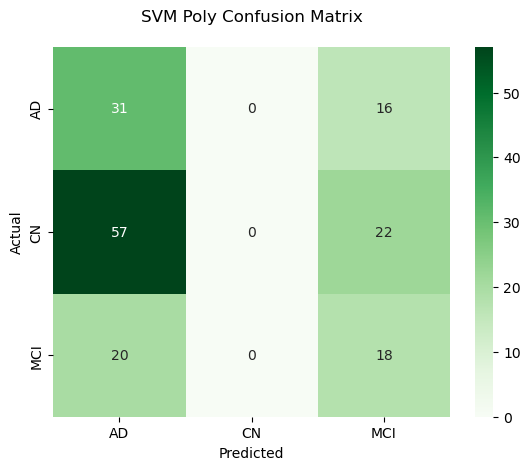

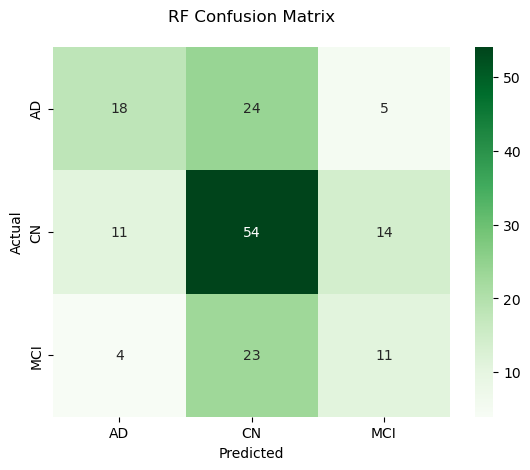

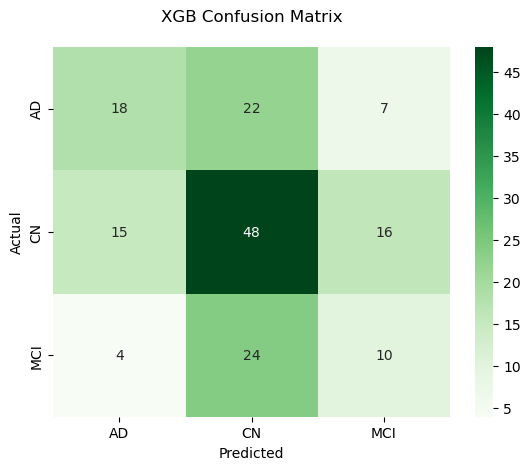

In [29]:
label_name=["AD","CN","MCI"]
ConfusionMatrix = confusion_matrix(np.array(y_test),np.array(svm_predict))
sns.heatmap(ConfusionMatrix, annot=True, fmt="d", cmap="Greens", xticklabels=label_name, yticklabels=label_name)
plt.title("SVM Poly Confusion Matrix\n")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


label_name=["AD","CN","MCI"]
ConfusionMatrix = confusion_matrix(np.array(y_test),np.array(RF_predict))
sns.heatmap(ConfusionMatrix, annot=True, fmt="d", cmap="Greens", xticklabels=label_name, yticklabels=label_name)
plt.title("RF Confusion Matrix\n")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


label_name=["AD","CN","MCI"]
ConfusionMatrix = confusion_matrix(np.array(y_test),np.array(xb_predict))
sns.heatmap(ConfusionMatrix, annot=True, fmt="d", cmap="Greens", xticklabels=label_name, yticklabels=label_name)
plt.title("XGB Confusion Matrix\n")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 3 classifiers Voting 

In [31]:
predict_voting = []
for i in range (len(svm_predict)): 
    voting_list =[0, 0, 0]
    if svm_predict[i] == 0:
         voting_list[0] += 1
    elif svm_predict[i] == 1:
         voting_list[1] += 1
    elif svm_predict[i] == 2:
         voting_list[2] += 1
            
    if RF_predict[i] == 0:
         voting_list[0] += 1
    elif RF_predict[i] == 1:
         voting_list[1] += 1
    elif RF_predict[i] == 2:
         voting_list[2] += 1
            
    if xb_predict[i] == 0:
         voting_list[0] += 1
    elif xb_predict[i] == 1:
         voting_list[1] += 1
    elif xb_predict[i] == 2:
         voting_list[2] += 1
            
    predict_voting.append(np.argmax(voting_list))
    

print("The predicted labels of the combined models are:",predict_voting)
print("The accuracy score of the combined models is",accuracy_score(np.array(y_test),np.array(predict_voting))*100)

The predicted labels of the combined models are: [1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 0, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 0, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 2, 0, 1, 0, 2, 2]
The accuracy score of the combined models is 45.1219512195122


# Confusion matrix of combined classifiers

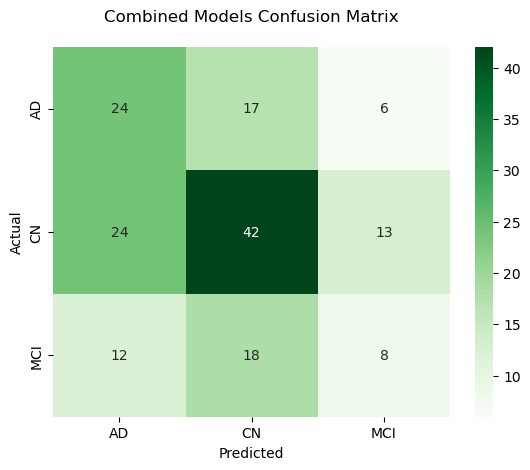

In [32]:
label_name=["AD","CN","MCI"]
ConfusionMatrix = confusion_matrix(np.array(y_test),np.array(predict_voting))
sns.heatmap(ConfusionMatrix, annot=True, fmt="d", cmap="Greens", xticklabels=label_name, yticklabels=label_name)
plt.title("Combined Models Confusion Matrix\n")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification report of combined classifiers

In [33]:
print("Classification Report of the Combined Models\n")
print(classification_report(np.array(y_test),np.array(predict_voting), target_names=["AD","CN","MCI"]))

Classification Report of the Combined Models

              precision    recall  f1-score   support

          AD       0.40      0.51      0.45        47
          CN       0.55      0.53      0.54        79
         MCI       0.30      0.21      0.25        38

    accuracy                           0.45       164
   macro avg       0.41      0.42      0.41       164
weighted avg       0.45      0.45      0.44       164

